<a href="https://colab.research.google.com/github/Krminfinity/track-tutorials/blob/main/%E6%A7%98%E3%80%85%E3%81%AAdetrending%E3%82%92%E8%A9%A6%E3%81%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

まずはいつもの定番ライブラリを読み込むことから始める。

In [38]:
#ggplot2とtidyverseは最初からインストールしてあるので、読み込むだけでOK
library(ggplot2)
library(tidyverse)

#1. トレンド除去

今回はさらにBNフィルターとCFフィルターおよびHPフィルターによるdetrendingを行うために**mFilter**という複数のdetrending手法をまとめたライブラリを用いる。Colabに最初から用意されているわけではないので、こちらはインストールする必要がある。

環境によっては5分～ぐらいの時間がかかる。

In [39]:
#mfilterをインストールし、読み込む
install.packages("mFilter", repos = "https://cran.rstudio.com/", dependencies = TRUE)
library(mFilter)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



今回用いるデータセットはFREDからダウンロードしたアメリカ合衆国の実質GDPである。

https://fred.stlouisfed.org/series/GDPC1

In [40]:
#データを読み込む
data <- read_csv("/content/GDPC1.csv")

Rows: 309 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): GDPC1
date (1): DATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [41]:
#読み込まれたデータを確認
data

DATE,GDPC1
<date>,<dbl>
1947-01-01,2182.681
1947-04-01,2176.892
1947-07-01,2172.432
1947-10-01,2206.452
1948-01-01,2239.682
1948-04-01,2276.690
1948-07-01,2289.770
1948-10-01,2292.364
1949-01-01,2260.807


実質GDP（GDPC1の列）について対数をとって新たに列に加える。

In [42]:
#logGDPの列をつくる
data$lnGDP <- log(data$GDPC1)

In [43]:
data

DATE,GDPC1,lnGDP
<date>,<dbl>,<dbl>
1947-01-01,2182.681,7.688309
1947-04-01,2176.892,7.685653
1947-07-01,2172.432,7.683603
1947-10-01,2206.452,7.699141
1948-01-01,2239.682,7.714089
1948-04-01,2276.690,7.730478
1948-07-01,2289.770,7.736207
1948-10-01,2292.364,7.737339
1949-01-01,2260.807,7.723477


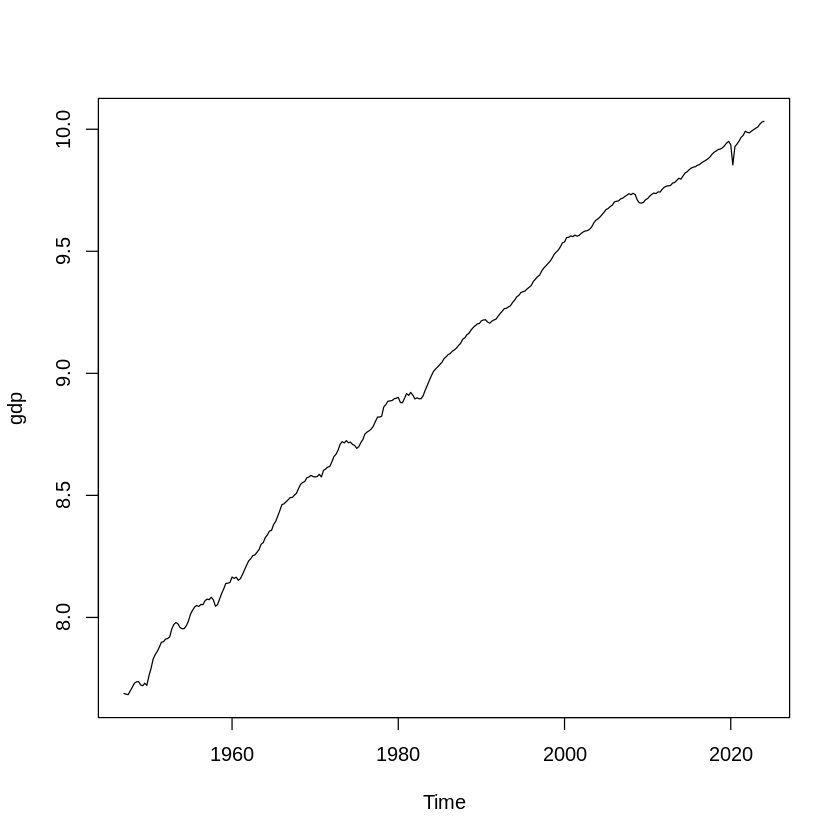

In [44]:
#データのうち、GDPの列を時系列データとしてRに認識させる
gdp <- ts(data$lnGDP, start = c(1947, 1), end = c(2024, 1), frequency = 4)
plot(gdp)

### 1. 線形トレンド除去

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


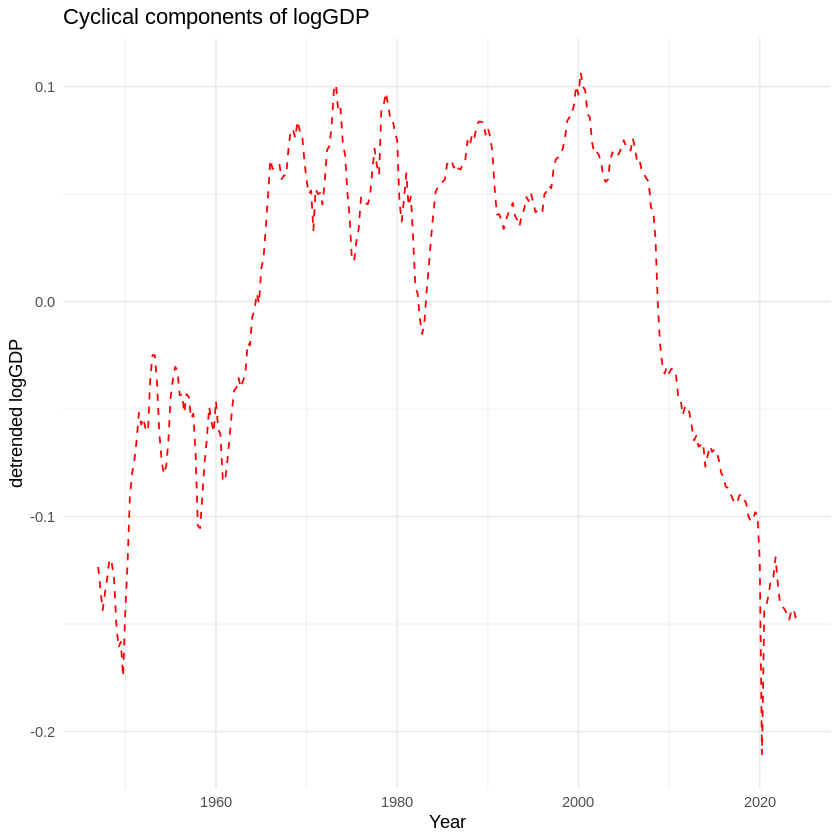

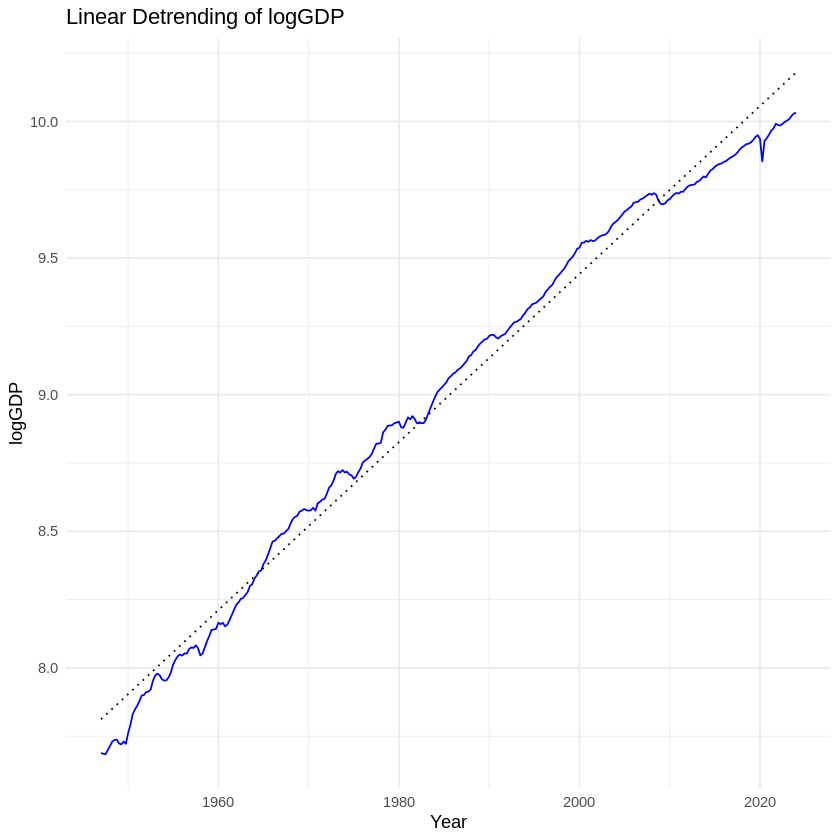

In [45]:
# linear detrendingを行う関数を定義する
linear_detrend <- function(data) {
  time <- time(data)  # 時間軸の取得
  trend <- lm(data ~ time)$coefficients[1] + lm(data ~ time)$coefficients[2] * time  # 線形トレンドの計算
  detrended_data <- data - trend # 線形トレンドを差し引く
  return(list(detrended_data = detrended_data, trend = trend))  # detrended_dataとtrendをリストとして返す
}

# linear detrendingを適用する
ldetrended_gdp <- linear_detrend(gdp)

# detrended_dataとtrendを取り出す
ldetrended_data <- ldetrended_gdp$detrended_data
ltrend <- ldetrended_gdp$trend

# グラフの描画
ggplot() +
  geom_line(aes(x = time(gdp), y = ldetrended_data), color = "red", linetype = "dashed") +
  labs(x = "Year", y = "detrended logGDP", title = "Cyclical components of logGDP") +
  theme_minimal()

# グラフの描画
ggplot() +
  geom_line(aes(x = time(gdp), y = gdp), color = "blue", linetype = "solid") +
  geom_line(aes(x = time(gdp), y = ltrend), color = "black", linetype = "dotted") +
  labs(x = "Year", y = "logGDP", title = "Linear Detrending of logGDP") +
  theme_minimal()

## 2. 2次トレンド除去

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


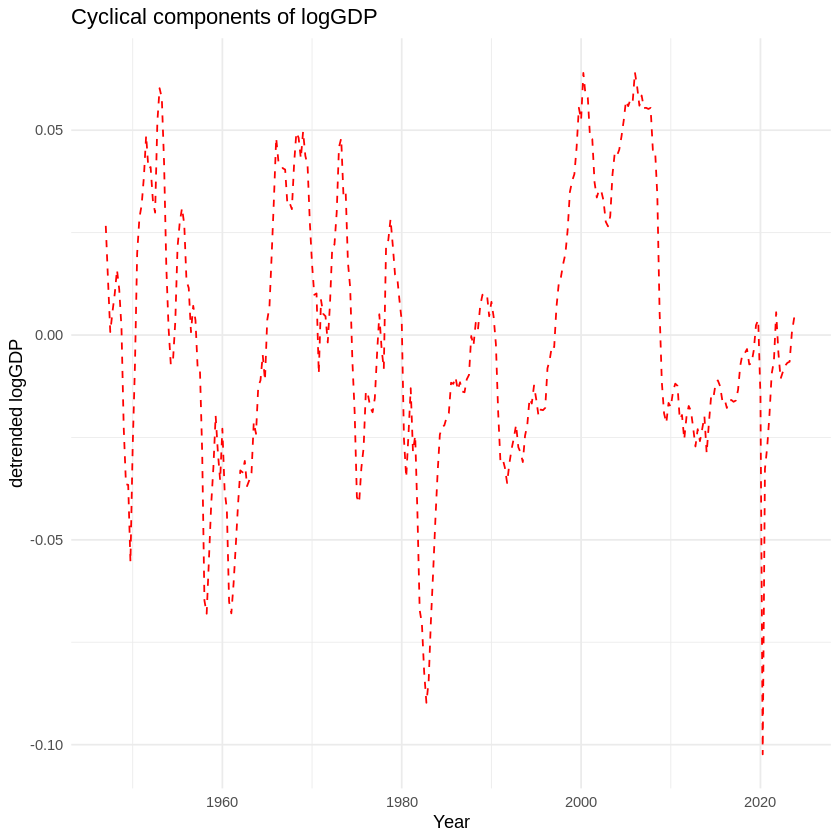

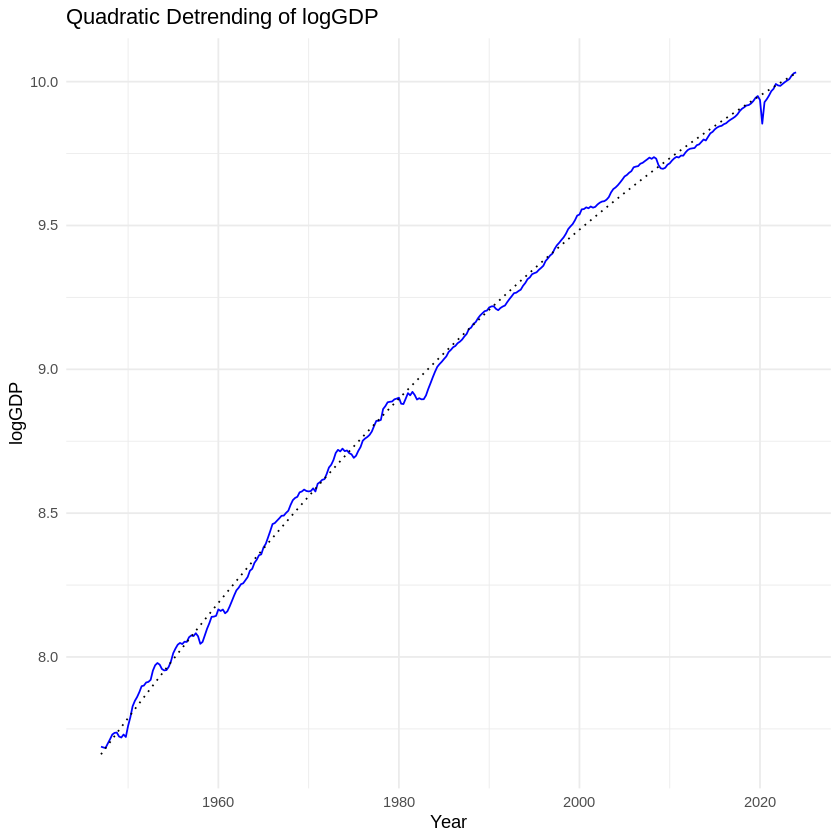

In [46]:
# quadratic detrendingを行う関数を定義する
quadratic_detrend <- function(data) {
  time <- time(data)  # 時間軸の取得
  time_squared <- time^2  # 時間の2乗を計算
  trend <- lm(data ~ time + time_squared)$coefficients[1] + lm(data ~ time + time_squared)$coefficients[2] * time + lm(data ~ time + time_squared)$coefficients[3] * time_squared  # 2次関数トレンドの計算
  detrended_data <- data - trend  # 2次関数トレンドを差し引く
  return(list(detrended_data = detrended_data, trend = trend))  # detrended_dataとtrendをリストとして返す
}

# quadratic detrendingを適用する
qdetrended_gdp <- quadratic_detrend(gdp)

# detrended_dataとtrendを取り出す
qdetrended_data <- qdetrended_gdp$detrended_data
qtrend <- qdetrended_gdp$trend

# グラフの描画
ggplot() +
  geom_line(aes(x = time(gdp), y = qdetrended_data), color = "red", linetype = "dashed") +
  labs(x = "Year", y = "detrended logGDP", title = "Cyclical components of logGDP") +
  theme_minimal()


# グラフの描画
ggplot() +
  geom_line(aes(x = time(gdp), y = gdp), color = "blue", linetype = "solid") +
  geom_line(aes(x = time(gdp), y = qtrend), color = "black", linetype = "dotted") +
  labs(x = "Year", y = "logGDP", title = "Quadratic Detrending of logGDP") +
  theme_minimal()

## 3. 一階差分

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


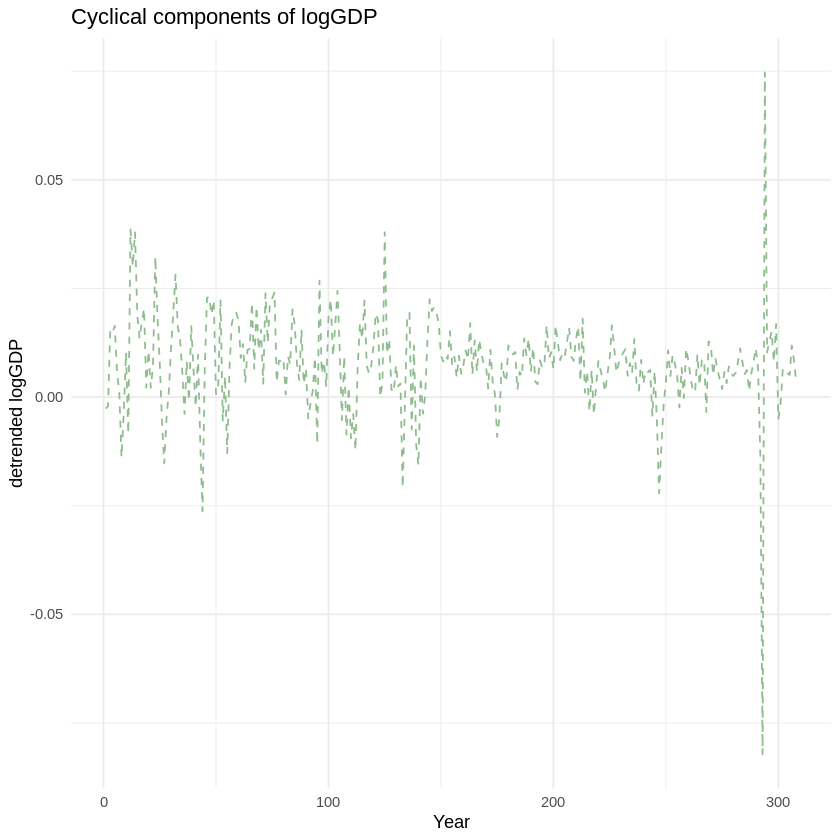

In [47]:
# GDPデータのfirst difference detrendingを行う
fdetrended_gdp <- diff(gdp)


# グラフの描画
ggplot() +
  geom_line(aes(x = seq_along(fdetrended_gdp), y = fdetrended_gdp), color = "darkseagreen", linetype = "dashed") +
  labs(x = "Year", y = "detrended logGDP", title = "Cyclical components of logGDP") +
  theme_minimal()

##4. Band pass filter（ここでは例としてChristiano-Fitzgerald filterを紹介する）

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


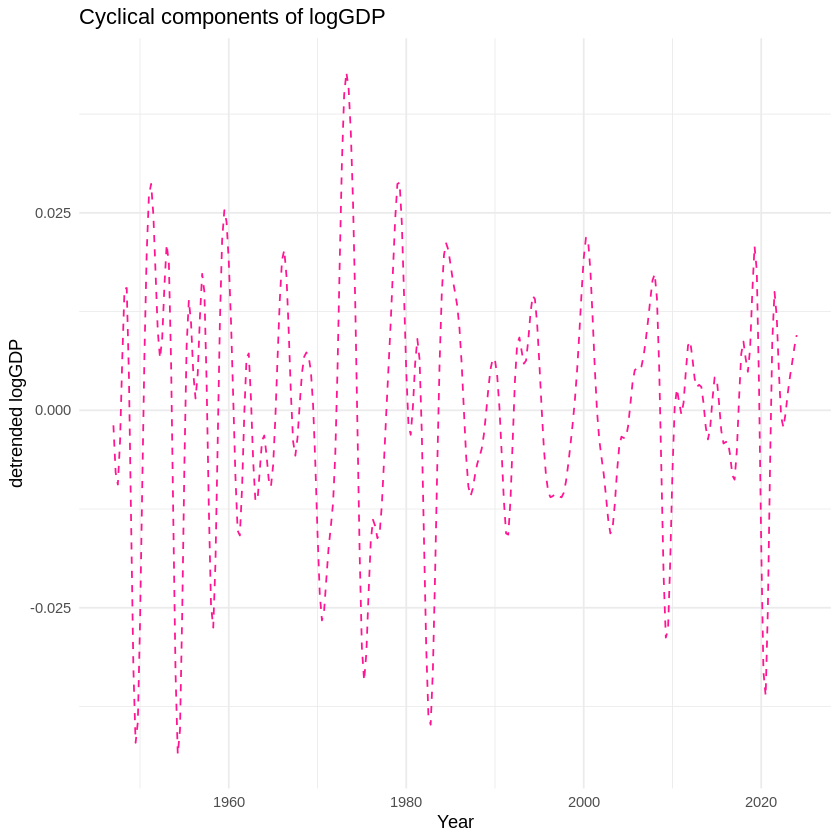

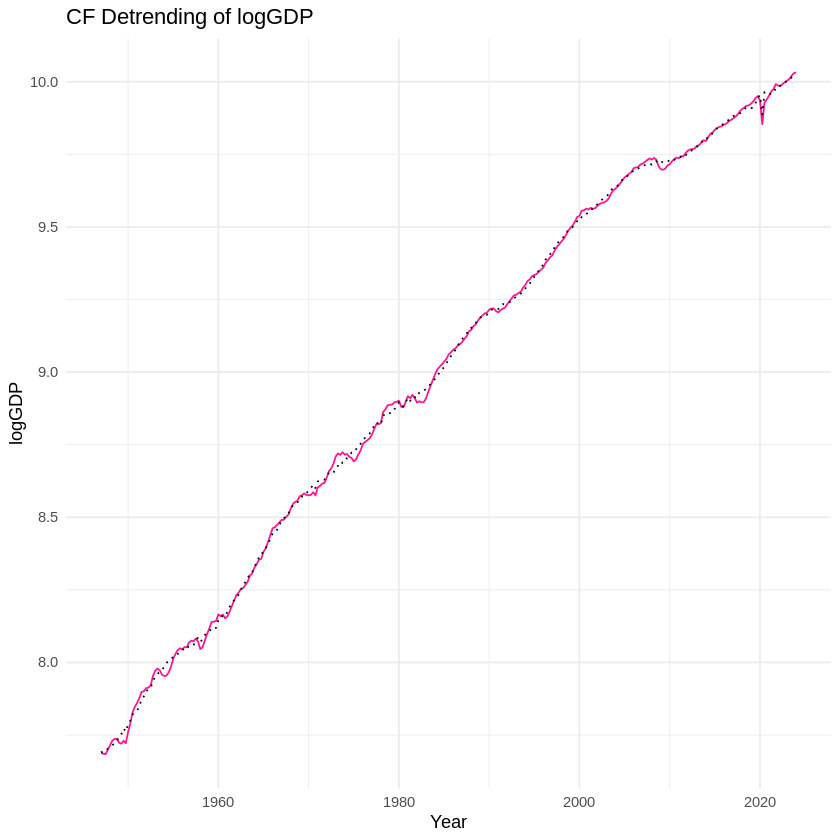

In [48]:
# GDPデータのCF filterによるdetrendingを行う
cf.decom <- cffilter(gdp, pl = 6, pu = 32, root = TRUE)


# グラフの描画
ggplot() +
  geom_line(aes(x = time(gdp), y = cf.decom$cycle), color = "deeppink", linetype = "dashed") +
  labs(x = "Year", y = "detrended logGDP", title = "Cyclical components of logGDP") +
  theme_minimal()


# グラフの描画
ggplot() +
  geom_line(aes(x = time(gdp), y = gdp), color = "deeppink", linetype = "solid") +
  geom_line(aes(x = time(gdp), y = cf.decom$trend), color = "black", linetype = "dotted") +
  labs(x = "Year", y = "logGDP", title = "CF Detrending of logGDP") +
  theme_minimal()

##5. HP filter

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


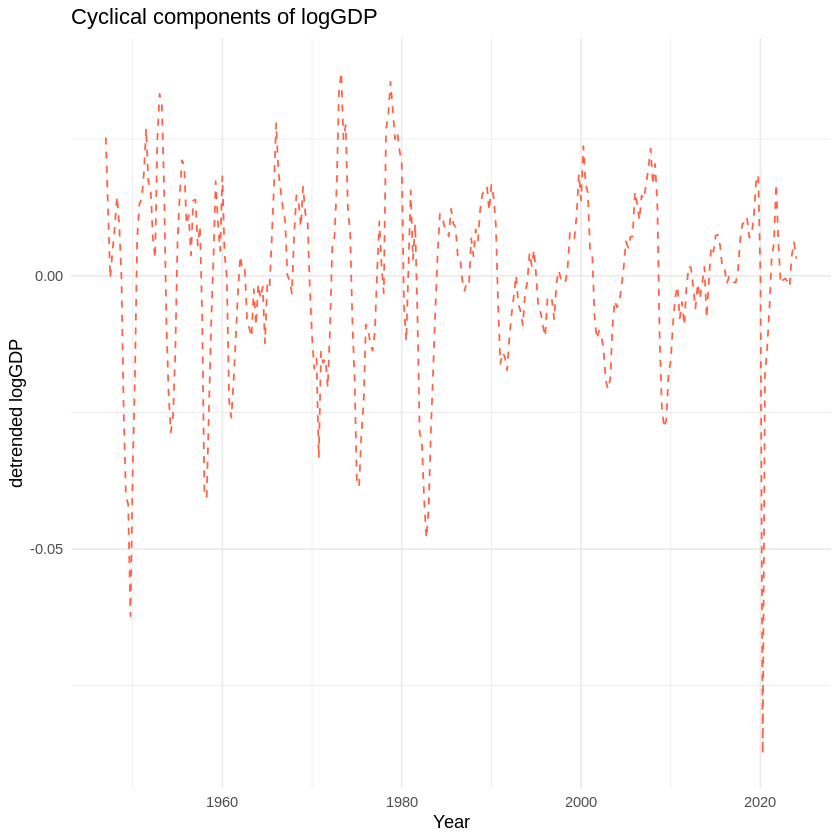

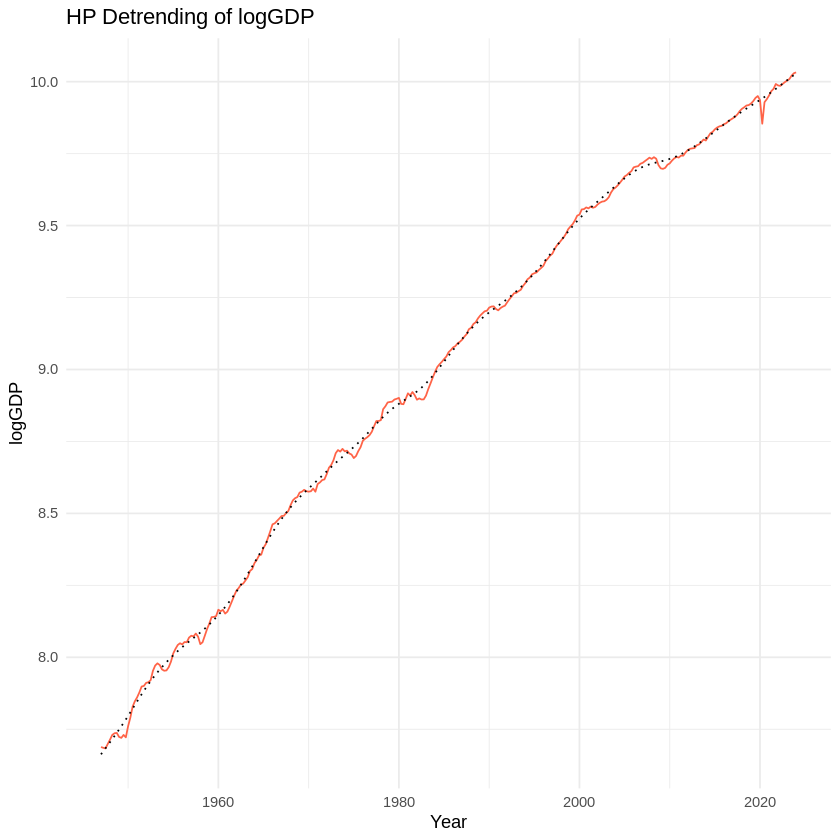

In [49]:
# GDPデータのCF filterによるdetrendingを行う
hp.decom <- hpfilter(gdp, freq = 1600, type = "lambda")


# グラフの描画
ggplot() +
  geom_line(aes(x = time(gdp), y = hp.decom$cycle), color = "tomato", linetype = "dashed") +
  labs(x = "Year", y = "detrended logGDP", title = "Cyclical components of logGDP") +
  theme_minimal()


# グラフの描画
ggplot() +
  geom_line(aes(x = time(gdp), y = gdp), color = "tomato", linetype = "solid") +
  geom_line(aes(x = time(gdp), y = hp.decom$trend), color = "black", linetype = "dotted") +
  labs(x = "Year", y = "logGDP", title = "HP Detrending of logGDP") +
  theme_minimal()

#2. 様々な変数の景気循環的な性質

ここでは、アメリカ合衆国の

*   実物消費 https://fred.stlouisfed.org/series/PCECC96
*   実物投資 https://fred.stlouisfed.org/series/GPDIC1
*   実物輸出 https://fred.stlouisfed.org/series/EXPGSC1
*   実物輸入 https://fred.stlouisfed.org/series/IMPGSC1
*   農業部門以外の就業者数 https://fred.stlouisfed.org/series/PAYEMS
*   名目利子率 https://fred.stlouisfed.org/series/FEDFUNDS
*   失業率 https://fred.stlouisfed.org/series/UNRATE
*   実物政府支出（政府消費＋政府投資） https://fred.stlouisfed.org/series/GCEC1

などについて、景気循環の間の性質を検証してみよう。

ここでは実物消費を例として考えてみる。

Rows: 309 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): IMPGSC1
date (1): DATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


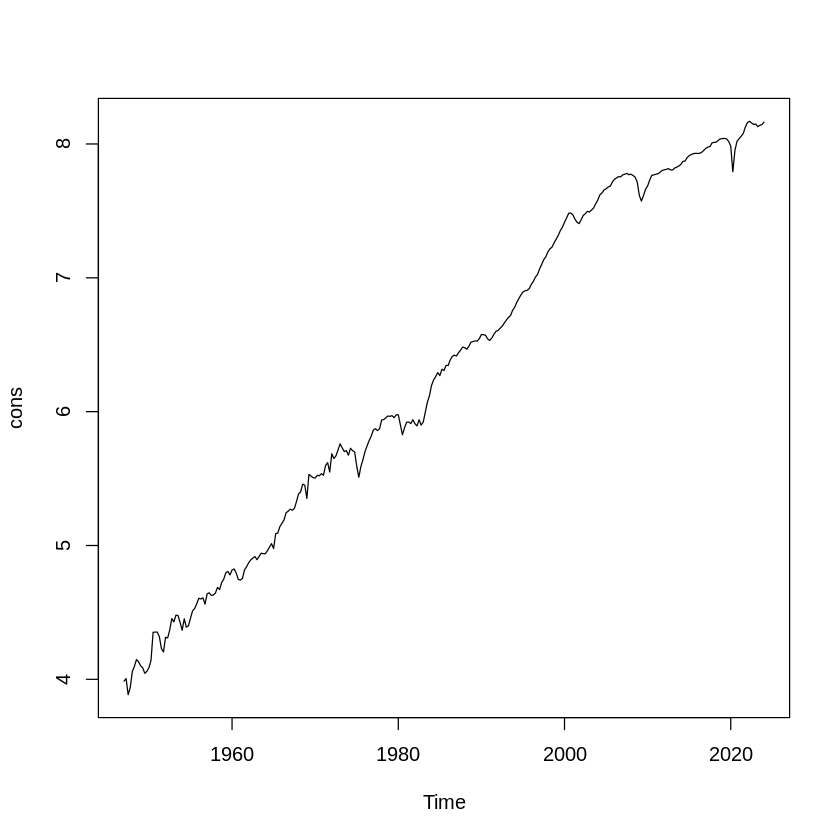

In [50]:
#消費データを読み込んでRに時系列データとして認識させる
cons_data <- read_csv("/content/IMPGSC1.csv")

cons <- ts(log(cons_data$IMPGSC1), start = c(1947, 1), frequency = 4)
plot(cons)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


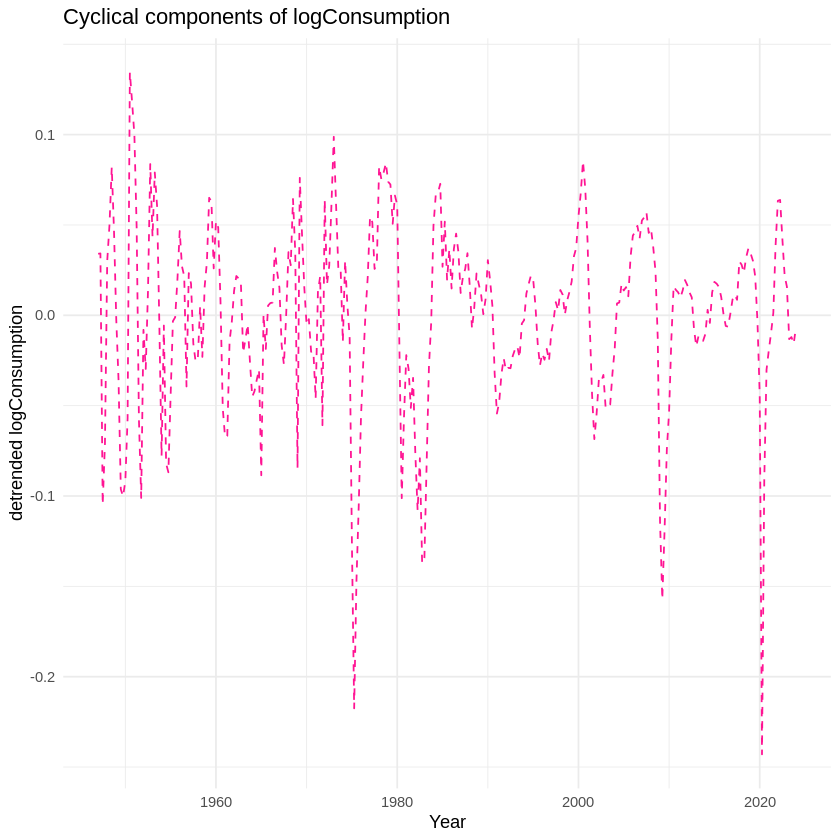

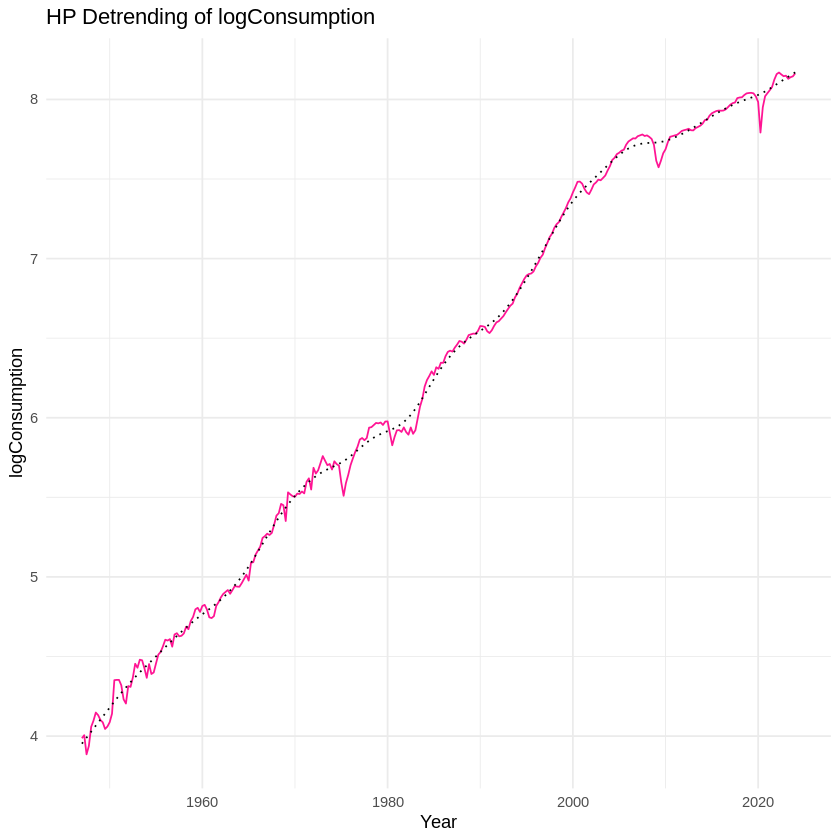

In [51]:
# 消費データのHP filterによるdetrendingを行う
cons_hp.decom <- hpfilter(cons, freq = 1600, type = "lambda")

# グラフの描画
ggplot() +
  geom_line(aes(x = time(cons), y = cons_hp.decom$cycle), color = "deeppink", linetype = "dashed") +
  labs(x = "Year", y = "detrended logConsumption", title = "Cyclical components of logConsumption") +
  theme_minimal()


# グラフの描画
ggplot() +
  geom_line(aes(x = time(cons), y = cons), color = "deeppink", linetype = "solid") +
  geom_line(aes(x = time(cons), y = cons_hp.decom$trend), color = "black", linetype = "dotted") +
  labs(x = "Year", y = "logConsumption", title = "HP Detrending of logConsumption") +
  theme_minimal()

detrendingした実質GDPと実質消費について、記述統計量を計算してみよう。

In [52]:
# GDPと消費のサイクル成分について記述統計量を計算する
summary(hp.decom$cycle)
summary(cons_hp.decom$cycle,type="text",summary = TRUE)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.087550 -0.007944  0.001129  0.000000  0.010191  0.037209 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.242955 -0.023801  0.007278  0.000000  0.030011  0.134446 

In [53]:
# 標準偏差を計算する

sd(hp.decom$cycle)
sd(cons_hp.decom$cycle)

[1] 0.01638447

[1] 0.05071244

実質GDPに比べて、実質消費のサイクル成分は変動が小さいようだ。さらにこれら2つの変数のサイクル成分の相関を調べてみよう。

[1] 0.7308497

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


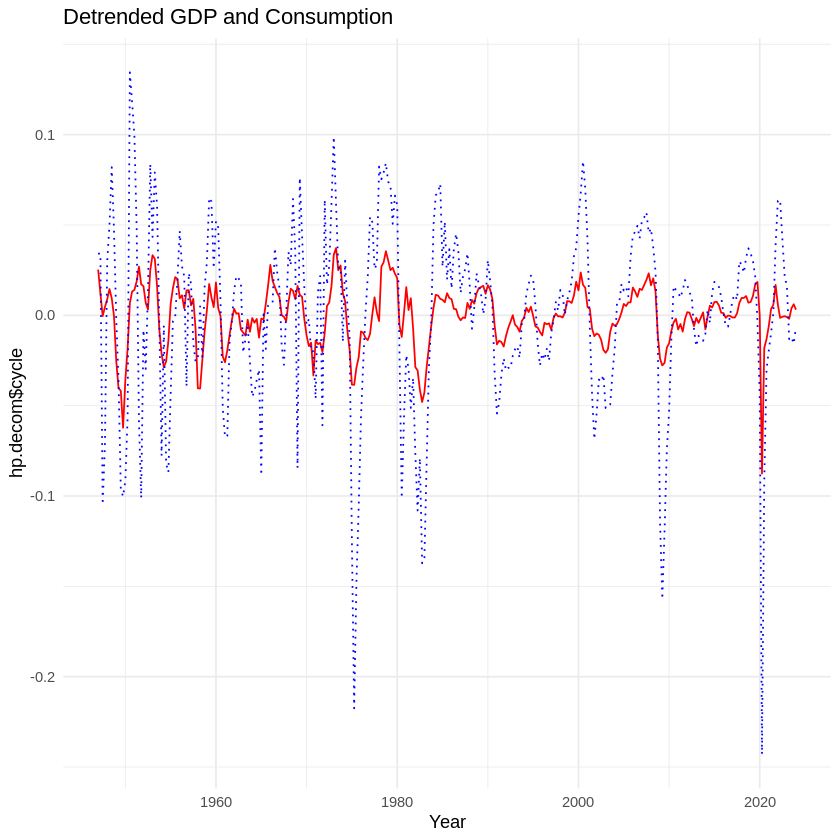

In [54]:
# GDPと消費のサイクル成分の相関を計算する
cor(hp.decom$cycle, cons_hp.decom$cycle)

# グラフの描画
ggplot() +
  geom_line(aes(x = time(hp.decom$cycle), y = hp.decom$cycle), color = "red", linetype = "solid") +
  geom_line(aes(x = time(cons_hp.decom$cycle), y = cons_hp.decom$cycle), color = "blue", linetype = "dotted") +
  labs(x = "Year", title = "Detrended GDP and Consumption") +
  theme_minimal()

サイクル成分の相関が非常に高いことがわかる。ここからわかることは何だろうか？

次に実質消費のサイクル成分が実質GDPのそれと比べて先行しているか遅行しているかを見てみよう。





そのためには2つの系列の相互相関を見ればよい。ccf関数（Cross-correlation）を使えば

$Corr(x_{t+h}, y_t), \ \ \  h=0, \pm1, \pm2, \cdots$

を計算して図示することができる。

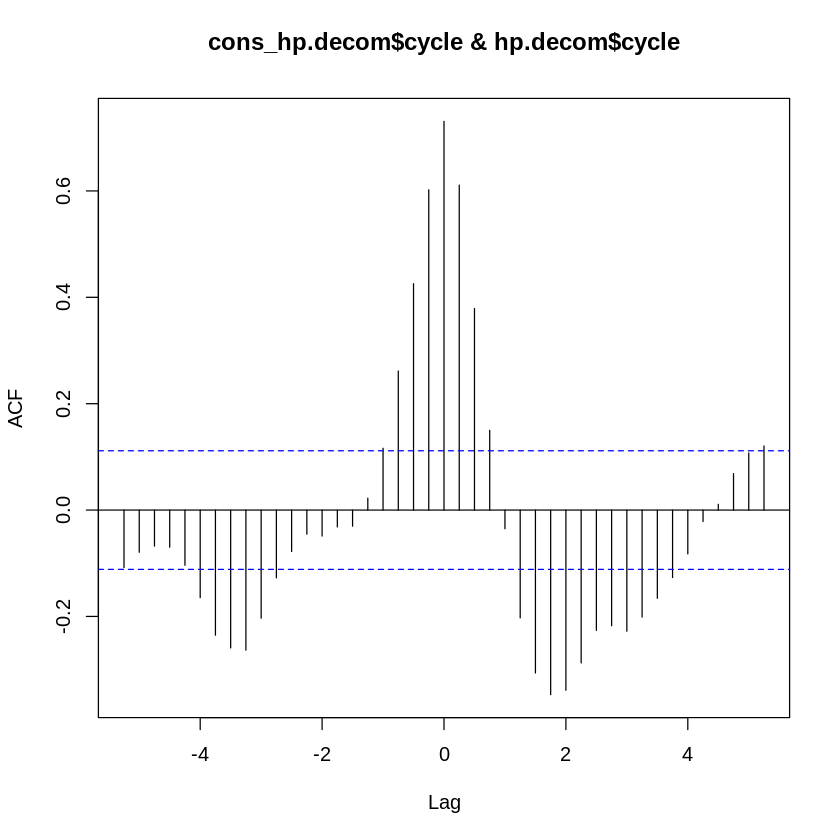

In [55]:
# GDPと消費のサイクル成分の相互相関を計算する
ccf(cons_hp.decom$cycle, hp.decom$cycle)

この図からわかることは何だろうか？

今度は失業率について、同様に実質GDPのサイクル成分との（同時）相関と相互相関を見てみよう。

In [56]:
# 失業率のデータを読み込む
unemp_data <- read_csv("/content/UNRATE.csv")
unemp_data$UNRATE = as.numeric(unemp_data$UNRATE)

unemp <- ts(unemp_data$UNRATE, start = c(1948, 1), end = c(2023, 1), frequency = 4)

# GDPのサイクル成分と失業率の相関を計算する
cor(hp.decom$cycle[-(1:4)], unemp)

# GDPのサイクル成分と失業率の相互相関を計算する
ccf(unemp, hp.decom$cycle)

ERROR: Error: '/content/UNRATE.csv' does not exist.
